### Have a look at the kaggle data
Download train.csv.zip and train-jpg-sample.tar.7z. Unpack them and put 
them into the folder `data/`. Afterwards you should be able to run the notebook. 

In [1]:
# Import stuff
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Modify plots
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 8]
matplotlib.rcParams['font.size'] = 18

In [2]:
# Read data labels
df = pd.read_csv('../data/train.csv', index_col='image_name')
df.tags = df.tags.apply(lambda s: s.split(' '))
df.head()

,tags
image_name,
train_0,"[haze, primary]"
train_1,"[agriculture, clear, primary, water]"
train_2,"[clear, primary]"
train_3,"[clear, primary]"
train_4,"[agriculture, clear, habitation, primary, road]"


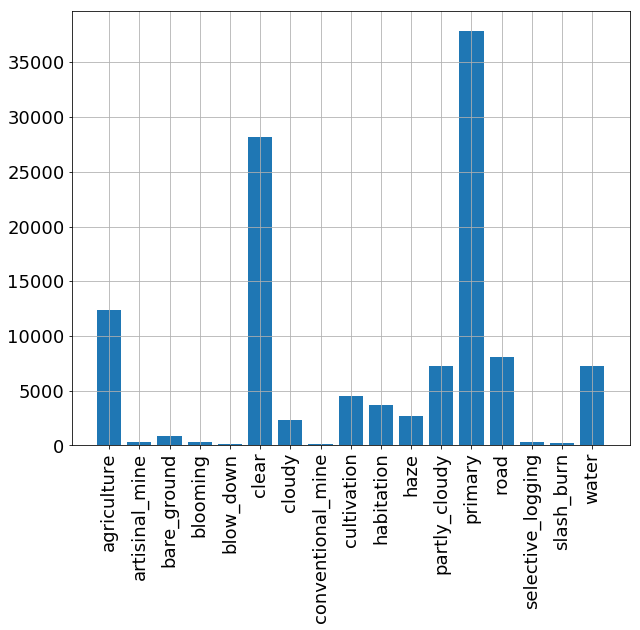

In [3]:
# Get categories and counts
categories, counts = np.unique(np.concatenate(df.tags), return_counts=True)

# Plot categories and counts
plt.bar(range(len(categories)), counts)
plt.xticks(range(len(categories)), categories, rotation=90)
plt.grid()
plt.show()

In [4]:
# Calculate co-occurance matrix
def calc_cooc_matrix(categories, series, normalize=True):
    n_entries = len(series)
    n_categories = len(categories)
    matrix = np.zeros((n_categories, n_categories))
    for x, x_label in enumerate(categories):
        for y, y_label in enumerate(categories):
            for entry in series:
                if x_label == y_label:
                    matrix[x, y] += 1
                elif x_label in entry and y_label in entry:
                    matrix[x, y] += 1
    return matrix/n_entries if normalize else matrix 

cooc_matrix = calc_cooc_matrix(categories, df.tags)

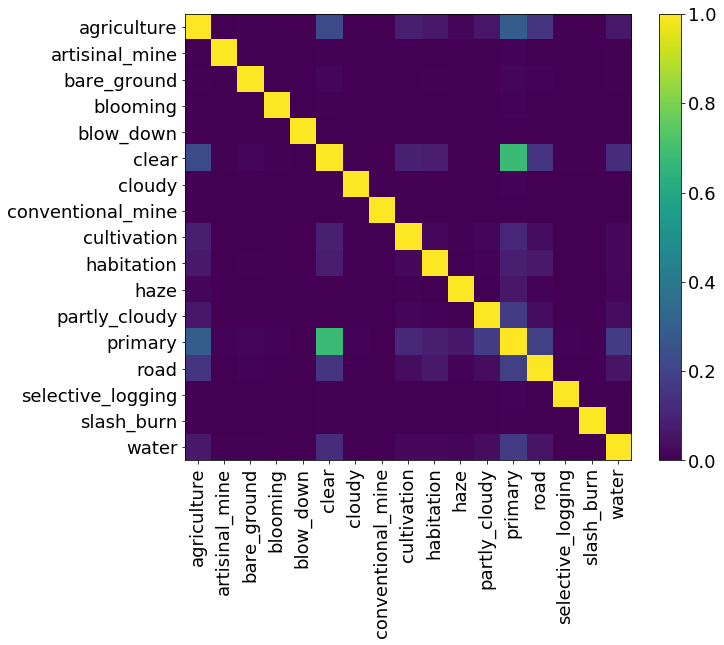

In [5]:
# Plot co-occurance matrix (the redundant rc code is due to 
# the strange behavior of matplotlibs matshow)
plt.figure(figsize=matplotlib.rcParams['figure.figsize'])
plt.matshow(cooc_matrix, fignum=1, cmap=plt.cm.viridis)
plt.colorbar()

plt.gca().tick_params(labelsize=10) 
plt.gca().xaxis.set_ticks_position('bottom')

plt.xticks(range(len(categories)), categories, rotation=90, 
           fontsize=matplotlib.rcParams['font.size'])
plt.yticks(range(len(categories)), categories,
           fontsize=matplotlib.rcParams['font.size'])

plt.show()

In [6]:
# TODO: Read data
#jpg_path = '../data/train-jpg-sample/'
#image_list = os.listdir(jpg_path)
#
#for image_path in image_list:
#    img = cv2.imread(jpg_path + image_path)
#    plt.imshow(img)
#    plt.title(df.loc[image_path.replace('.jpg', ''), 'tags'])
#    plt.show()